In [59]:
pip install pandas numpy matplotlib seaborn scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **1. Import Library**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [61]:
bank_df = pd.read_csv("./Dataset_inisiasi.csv")
bank_df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,KMeans_Cluster
0,45.0,3.0,39.0,5.0,1.0,3.0,29562.021903,777.0,10235.431574,1.108,1257.920930,42.0,1.067,0.061,1,1,0,0,0
1,49.0,5.0,44.0,6.0,1.0,2.0,27610.419536,864.0,6698.435505,1.108,1274.508170,33.0,1.067,0.105,0,0,1,0,2
2,51.0,3.0,36.0,4.0,1.0,1.0,25341.342862,0.0,3259.424449,1.108,1836.801649,28.0,1.067,0.000,1,1,0,0,0
3,40.0,4.0,34.0,3.0,4.0,1.0,25290.328958,2517.0,787.026869,1.108,1257.920930,28.0,1.067,0.760,0,0,0,1,1
4,40.0,3.0,22.0,5.0,1.0,1.0,25965.558760,0.0,4420.792650,1.108,1257.920930,28.0,1.067,0.000,1,1,0,0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [62]:
# Memisahkan fitur dan target
X = bank_df.drop(columns=["KMeans_Cluster"])
y = bank_df["KMeans_Cluster"]

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verifikasi bentuk data
print("Data Training:")
print(f"X: {X_train.shape}, y: {y_train.shape} ")
print("\nData Testing:")
print(f"X: {X_test.shape}, y: {y_test.shape}")

Data Training:
X: (7212, 18), y: (7212,) 

Data Testing:
X: (1803, 18), y: (1803,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [63]:
# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [64]:
# Melatih model
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f" {name} telah dilatih.")

 Random Forest telah dilatih.
 Logistic Regression telah dilatih.
 K-Nearest Neighbors telah dilatih.
 Decision Tree telah dilatih.


E:\Task-Coding-Camp\myvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dalam kode ini menggunakan empat algoritma Machine Learning untuk klasifikasi yakni:
1. Random Forest
   - Merupakan metode ensemble berbasis Decision Tree.
   - Menggunakan banyak pohon keputusan dan mengambil voting mayoritas untuk menentukan hasil akhir.
   - Mengurangi risiko overfitting dibandingkan dengan Decision Tree tunggal.
2. Logistic Regression
   - Model berbasis statistik yang menggunakan fungsi sigmoid untuk memetakan input ke probabilitas kelas.
   - Cocok untuk klasifikasi biner dan multiclass dengan hubungan linear antara fitur dan target.
   - Menggunakan pendekatan probabilistik untuk membuat keputusan klasifikasi.
3. K-Nearest Neighbors (KNN)
   - Menentukan kelas berdasarkan mayoritas dari k tetangga terdekat dalam ruang fitur.
   - Tidak memerlukan pelatihan eksplisit, karena klasifikasi dilakukan saat prediksi
     dengan membandingkan jarak antar sampel.
   - Performanya bergantung pada pemilihan jumlah tetangga (k) dan metrik jarak yang digunakan.
4. Decision Tree
   - Menggunakan struktur pohon untuk memisahkan data berdasarkan fitur yang memberikan informasi paling banyak.
   - Memiliki interpretasi yang mudah namun rentan terhadap overfitting jika tidak dipangkas dengan baik.
   - Efektif untuk menangani data yang memiliki hubungan non-linear.

Dalam proses pelatihan, setiap model diinisialisasi, dilatih menggunakan data latih (X_train, y_train), dan disimpan dalam dictionary trained_models. Setelah semua model selesai dilatih, mereka siap untuk dievaluasi guna menentukan performa terbaik dalam klasifikasi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [65]:
# Evaluasi model
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Simpan hasil evaluasi
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix
    }

    print(f" {name} selesai dievaluasi dengan akurasi: {accuracy:.4f}")

 Random Forest selesai dievaluasi dengan akurasi: 1.0000
 Logistic Regression selesai dievaluasi dengan akurasi: 0.9235
 K-Nearest Neighbors selesai dievaluasi dengan akurasi: 0.4454
 Decision Tree selesai dievaluasi dengan akurasi: 1.0000


In [66]:
# Tampilkan hasil evaluasi
for model, metrics in results.items():
    print(f"\n Model: {model}")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"  {metric}: {value:.4f}")
    print("-" * 50)


 Model: Random Forest
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
--------------------------------------------------

 Model: Logistic Regression
  Accuracy: 0.9235
  Precision: 0.9230
  Recall: 0.9235
  F1-Score: 0.9228
--------------------------------------------------

 Model: K-Nearest Neighbors
  Accuracy: 0.4454
  Precision: 0.4455
  Recall: 0.4454
  F1-Score: 0.4418
--------------------------------------------------

 Model: Decision Tree
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
--------------------------------------------------


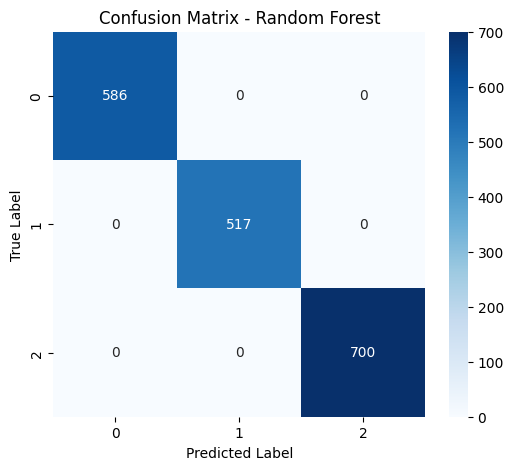

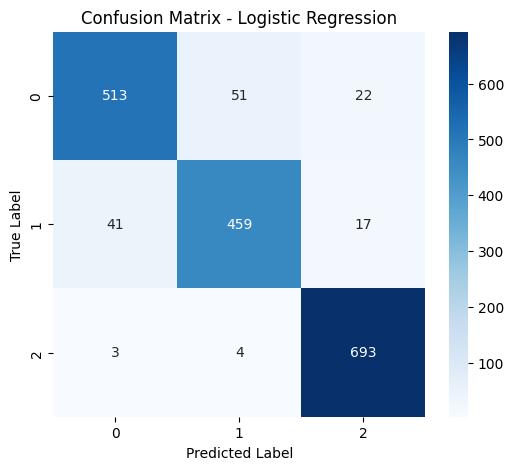

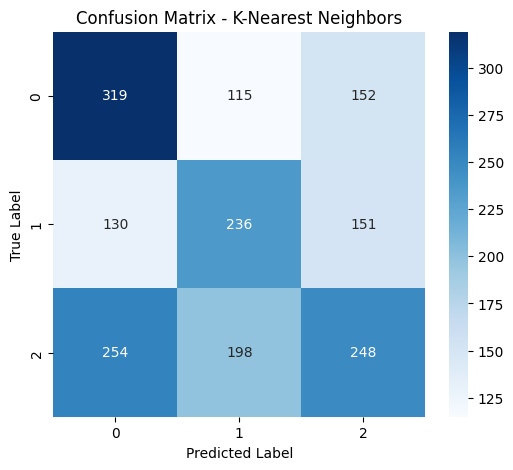

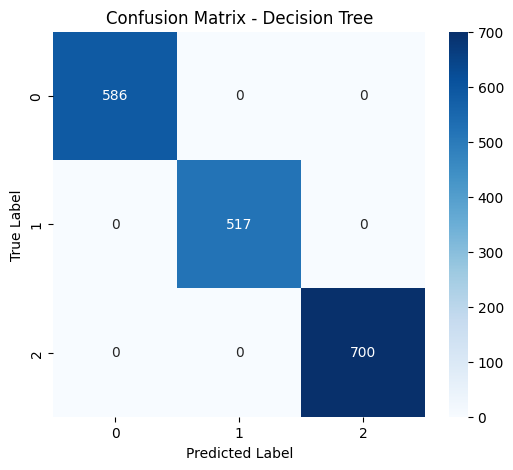

In [67]:
# Visualisasi Confusion Matrix untuk setiap model
for name, metrics in results.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

Nanti diubah

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [68]:
# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["lbfgs", "liblinear"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    }
}

In [69]:
# Inisialisasi model
base_models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


In [70]:
# Menyimpan model terbaik setelah tuning
best_models = {}

for name, model in base_models.items():
    print(f" Melakukan tuning untuk {name} ...")
    
    grid_search = GridSearchCV(model, param_grid[name], cv=3, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    
    print(f" {name} selesai tuning. Hyperparameter terbaik: {grid_search.best_params_}")


 Melakukan tuning untuk Random Forest ...
 Random Forest selesai tuning. Hyperparameter terbaik: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
 Melakukan tuning untuk Logistic Regression ...
 Logistic Regression selesai tuning. Hyperparameter terbaik: {'C': 1, 'solver': 'liblinear'}
 Melakukan tuning untuk K-Nearest Neighbors ...
 K-Nearest Neighbors selesai tuning. Hyperparameter terbaik: {'n_neighbors': 9, 'weights': 'distance'}
 Melakukan tuning untuk Decision Tree ...
 Decision Tree selesai tuning. Hyperparameter terbaik: {'max_depth': None, 'min_samples_split': 2}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [71]:
# Evaluasi model setelah tuning
results = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix
    }

    print(f" {name} dievaluasi dengan akurasi: {accuracy:.4f}")


 Random Forest dievaluasi dengan akurasi: 1.0000
 Logistic Regression dievaluasi dengan akurasi: 0.9994
 K-Nearest Neighbors dievaluasi dengan akurasi: 0.4354
 Decision Tree dievaluasi dengan akurasi: 1.0000


In [74]:
# Menyimpan hasil evaluasi dalam DataFrame
eval_df = pd.DataFrame(results).T  # Transpose agar model menjadi indeks

# Menampilkan hasil evaluasi dalam bentuk tabel
print("\n Evaluasi Model Setelah Tuning:\n")
print(eval_df)


 Evaluasi Model Setelah Tuning:

                     Accuracy Precision    Recall  F1-Score  \
Random Forest             1.0       1.0       1.0       1.0   
Logistic Regression  0.999445  0.999446  0.999445  0.999445   
K-Nearest Neighbors  0.435385  0.435431  0.435385    0.4354   
Decision Tree             1.0       1.0       1.0       1.0   

                                                      Confusion Matrix  
Random Forest                  [[586, 0, 0], [0, 517, 0], [0, 0, 700]]  
Logistic Regression            [[586, 0, 0], [0, 516, 1], [0, 0, 700]]  
K-Nearest Neighbors  [[280, 99, 207], [87, 223, 207], [216, 202, 282]]  
Decision Tree                  [[586, 0, 0], [0, 517, 0], [0, 0, 700]]  


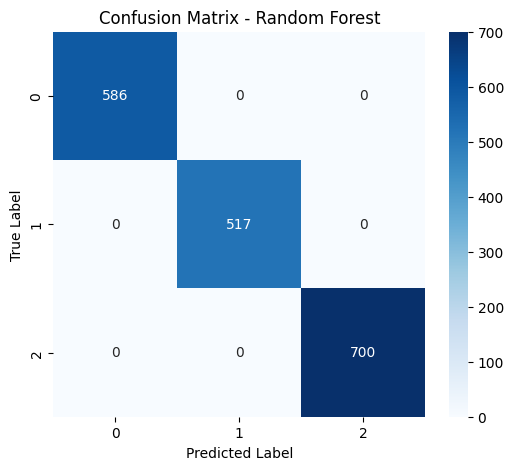

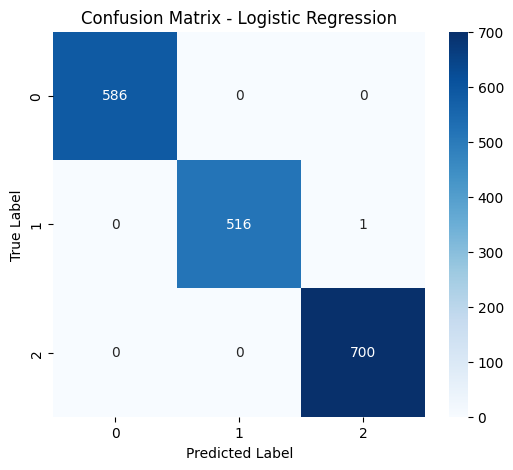

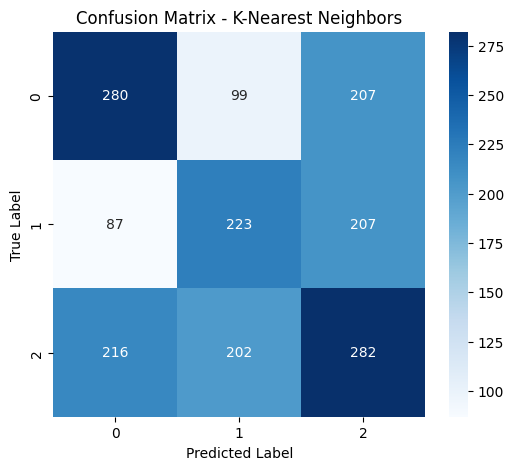

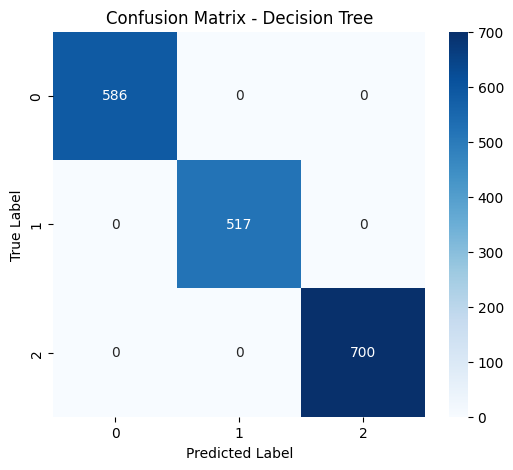

In [75]:
# Menampilkan Confusion Matrix
for name, metrics in results.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Nanti diubah